In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

/Users/Matt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(2580, 81)

### Simple plot of the sale price

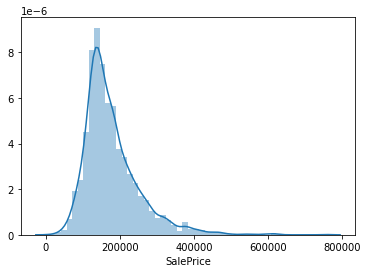

In [14]:
sns.distplot(housing.SalePrice,norm_hist=False)

### Simple plot of the log of sale price

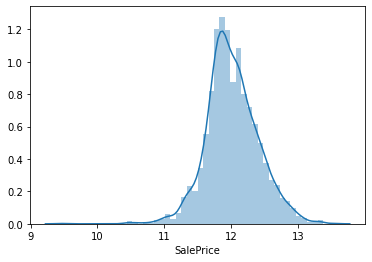

In [15]:
sns.distplot(np.log(housing.SalePrice),norm_hist=False)

### Box Cox Transformation without standardization

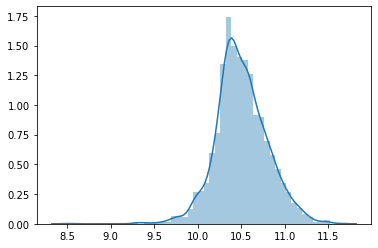

In [89]:
from sklearn.preprocessing import power_transform
sale_array = housing.SalePrice.to_numpy().reshape(-1,1)
sale_array = power_transform(sale_array,method='box-cox',standardize=False)
sns.distplot(sale_array,norm_hist=False)

### Box Cox Transformation with Standardization (Mean = 0, divided by standard deviation)

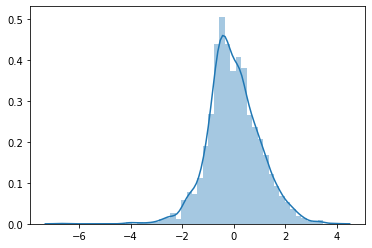

In [87]:
from sklearn.preprocessing import power_transform
sale_array2 = housing.SalePrice.to_numpy().reshape(-1,1)
sale_array2 = power_transform(sale_array,method='box-cox',standardize=True)
sns.distplot(sale_array2,norm_hist=False)

### QQ plot of Sale Price

((array([-3.46146137, -3.21508059, -3.0786851 , ...,  3.0786851 ,
          3.21508059,  3.46146137]),
  array([ 12789,  34900,  35000, ..., 615000, 625000, 755000])),
 (70328.14722123831, 178059.62325581396, 0.93637315329943))

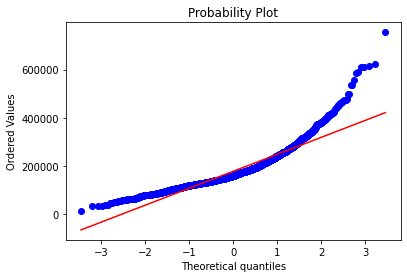

In [98]:
import scipy.stats as stats
stats.probplot(housing.SalePrice, dist="norm",plot=plt)

### QQ plot of log of the Sale Price, note that r = .99286, and r^2 will be the square

((array([-3.46146137, -3.21508059, -3.0786851 , ...,  3.0786851 ,
          3.21508059,  3.46146137]),
  array([ 9.45634071, 10.46024211, 10.46310334, ..., 13.32937755,
         13.34550693, 13.53447303])),
 (0.3849541898176002, 12.013473787587431, 0.9928608058154407))

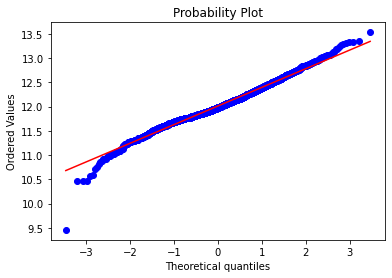

In [18]:
import scipy.stats as stats
stats.probplot(np.log(housing.SalePrice), dist="norm",plot=plt)

### Box-Cox Transformation With Lambda and QQ-plot to check for normality, r = 0.99275

lambda equals:  [-0.02286262]


((array([-3.46146137, -3.21508059, -3.0786851 , ...,  3.0786851 ,
          3.21508059,  3.46146137]),
  array([ 8.5039769 ,  9.30348642,  9.30573899, ..., 11.48985839,
         11.50174858, 11.64072372])),
 (0.2924429398668518, 10.503582425214706, 0.9927577543177935))

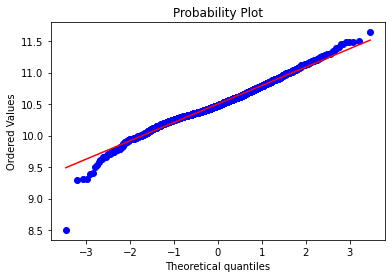

In [72]:
from sklearn.preprocessing import PowerTransformer
#Initialize PowerTransformer, with box-cox, and no standardization i.e. zero mean and divided by standard dev.
pt = PowerTransformer(method='box-cox',standardize=False)
#Transform sales to flat numpy array to be used by fit method
sale_array = housing.SalePrice.to_numpy().reshape(-1,1)
#Fit the data
pt.fit(sale_array)
#Get lambda, for transforming back into sale price
print("lambda equals: ",pt.lambdas_)
#Turn array back into Pandas series, need to flatten to get it into a Series object
#Get QQ plot
stats.probplot(pd.Series(pt.transform(sale_array).flatten()), dist="norm",plot=plt)

### Looking at Above Grade (Ground) Living Area in square feet.

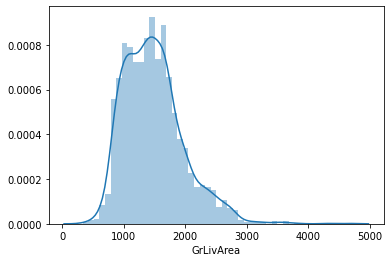

In [92]:
sns.distplot(housing.GrLivArea,norm_hist=False)

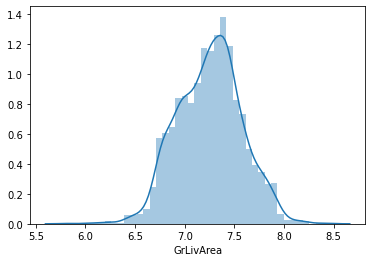

In [93]:
sns.distplot(np.log(housing.GrLivArea),norm_hist=False)

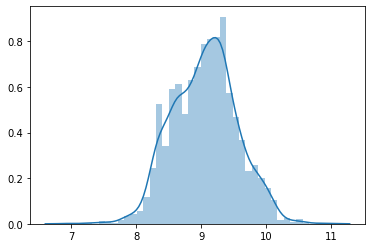

In [94]:
from sklearn.preprocessing import power_transform
grlivearea_array = housing.GrLivArea.to_numpy().reshape(-1,1)
grlivearea_array = power_transform(grlivearea_array,method='box-cox',standardize=False)
sns.distplot(grlivearea_array,norm_hist=False)

((array([-3.46146137, -3.21508059, -3.0786851 , ...,  3.0786851 ,
          3.21508059,  3.46146137]),
  array([ 334,  407,  438, ..., 3820, 4316, 4676])),
 (477.0949923145554, 1486.0399224806201, 0.9753664742826194))

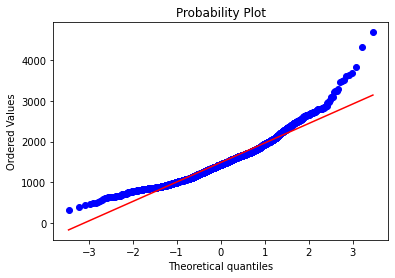

In [95]:
import scipy.stats as stats
stats.probplot(housing.GrLivArea, dist="norm",plot=plt)

((array([-3.46146137, -3.21508059, -3.0786851 , ...,  3.0786851 ,
          3.21508059,  3.46146137]),
  array([5.81114099, 6.00881319, 6.08221891, ..., 8.2480057 , 8.37008433,
         8.45019832])),
 (0.3228221839298782, 7.252011292347641, 0.9982369776594966))

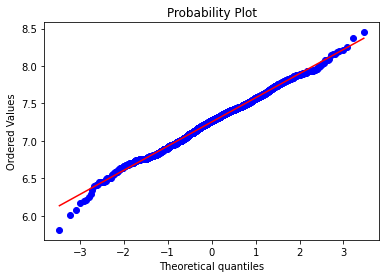

In [96]:
#Log of GrLivArea looks much better on QQ than GrLivArea
import scipy.stats as stats
stats.probplot(np.log(housing.GrLivArea), dist="norm",plot=plt)

lambda equals:  [0.05897056]


((array([-3.46146137, -3.21508059, -3.0786851 , ...,  3.0786851 ,
          3.21508059,  3.46146137]),
  array([ 6.93102956,  7.21112501,  7.31597285, ..., 10.62281598,
         10.82208515, 10.95363716])),
 (0.49502461719344554, 9.054268490192205, 0.9983647525502697))

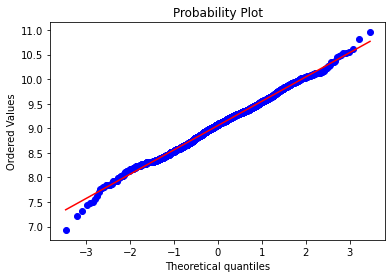

In [97]:
from sklearn.preprocessing import PowerTransformer
#Initialize PowerTransformer, with box-cox, and no standardization i.e. zero mean and divided by standard dev.
pt = PowerTransformer(method='box-cox',standardize=False)
#Transform sales to flat numpy array to be used by fit method
grlivearea_array = housing.GrLivArea.to_numpy().reshape(-1,1)
#Fit the data
pt.fit(grlivearea_array)
#Get lambda, for transforming back into sale price
print("lambda equals: ",pt.lambdas_)
#Turn array back into Pandas series, need to flatten to get it into a Series object
#Get QQ plot
stats.probplot(pd.Series(pt.transform(grlivearea_array).flatten()), dist="norm",plot=plt)

### Both log GrLivArea and the Box Cox transform look good on QQ plots; likely to use log for simplicity.
### Tried transforming all columns, but the zero values prevent transformation

In [162]:
from sklearn.preprocessing import PowerTransformer
#Initialize PowerTransformer, with box-cox, and no standardization i.e. zero mean and divided by standard dev.
pt = PowerTransformer(method='box-cox',standardize=False)
#Transform sales to flat numpy array to be used by fit method
grlivearea_array = housing.MasVnrArea.to_numpy().reshape(-1,1)
#Fit the data
pt.fit(grlivearea_array)
#Get lambda, for transforming back into sale price
print("lambda equals: ",pt.lambdas_)
#Turn array back into Pandas series, need to flatten to get it into a Series object
#Get QQ plot
stats.probplot(pd.Series(pt.transform(grlivearea_array).flatten()), dist="norm",plot=plt)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [205]:
pt = PowerTransformer(method='box-cox',standardize=False)
grlivearea_array = size_related['TotalBsmtSF'].to_numpy().reshape(-1,1)
grlivearea_array = grlivearea_array[:] +1
pt.fit(grlivearea_array)


PowerTransformer(copy=True, method='box-cox', standardize=False)